In [1]:
path = "../input/scene_classification/scene_classification/train/"

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 256

In [4]:
df = pd.read_csv('../input/scene_classification/scene_classification/train.csv')
df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [5]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0)
data = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=256)
        .databunch(num_workers=0))

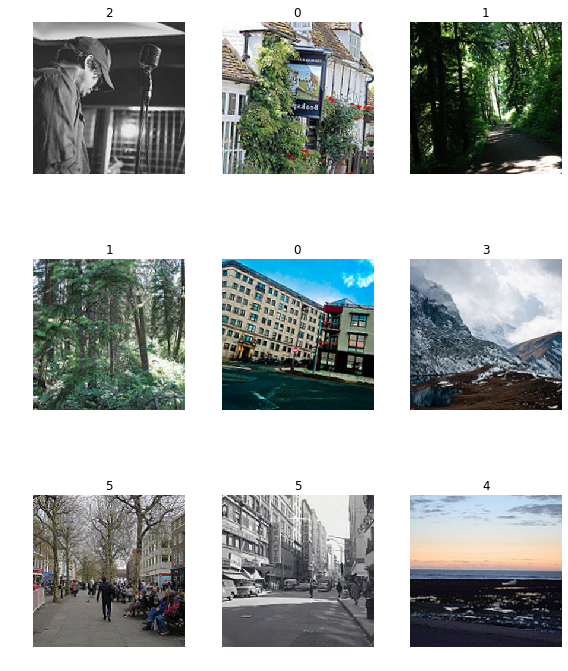

In [6]:
data.show_batch(rows=3, figsize=(8,10))

In [7]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [8]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 23884736.65it/s]


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.390114,0.264499,0.094245,0.905755,03:02
1,0.278583,0.210193,0.078978,0.921022,02:45
2,0.231175,0.194859,0.070464,0.929536,02:46
3,0.200478,0.189478,0.071051,0.928949,02:45


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

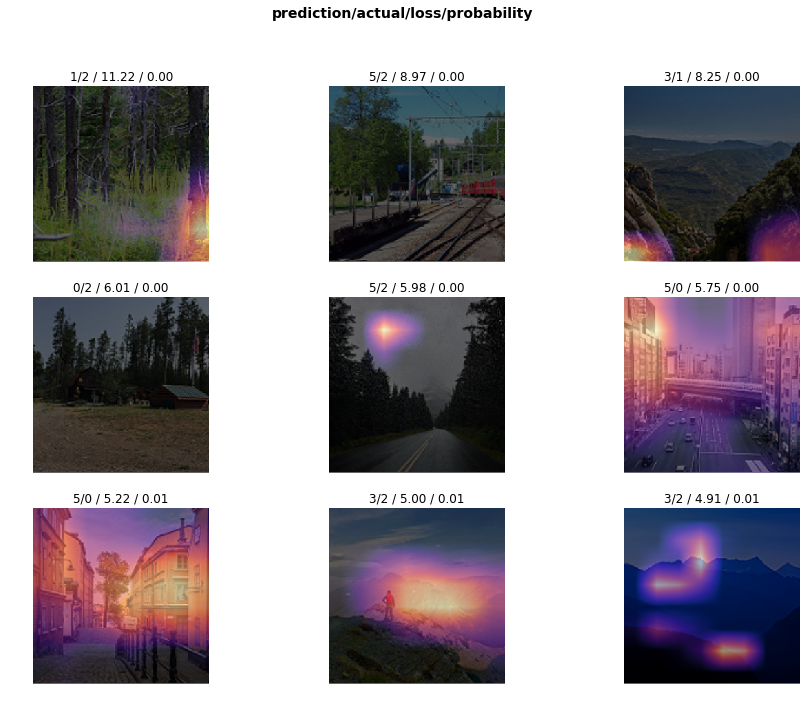

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

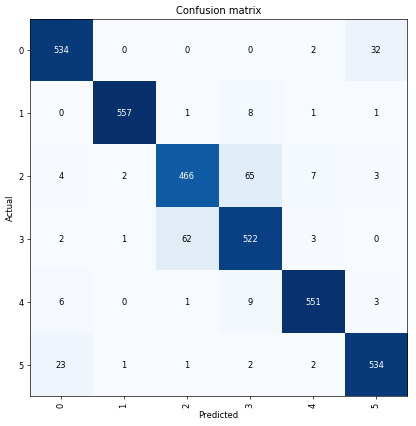

In [12]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [13]:
learn.save('/kaggle/working/stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


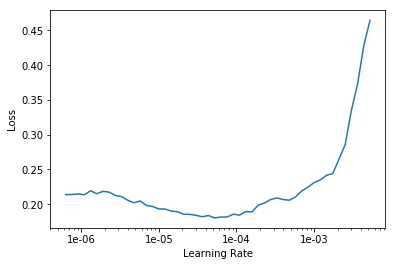

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.182572,0.182907,0.068702,0.931298,02:56


In [18]:
learn.save('/kaggle/working/stage-2')

In [19]:
# preds,_ = learn.get_preds(ds_type=DatasetType.Test)

In [20]:
# labelled_preds = []
# for pred in preds:
#     labelled_preds.append(int(np.argmax(pred)))
    
# # labelled_preds[0:10]
# len(labelled_preds)

In [21]:
# import os
# filenames = os.listdir('../input/scene_classification/scene_classification/test/')

In [22]:
# len(filenames) == len(labelled_preds)

In [23]:
# submission = pd.DataFrame(
#     {'image_name': filenames,
#      'label': labelled_preds,
#     })

In [24]:
# submission.to_csv('first_submission.csv')

In [25]:
# download the notebook before committing